O objetivo deste notebook é avaliar o argumento correlacional a favor do uso do valor *p*, a ser mais bem apresentado a seguir. A discussão é baseada no seguinte artigo: **Trafimow, D., & Rice, S. (2009). A test of the null hypothesis significance testing procedure correlation argument. *The Journal of General Psychology*, *136*(3), 261–270. https://doi.org/10.3200/GENP.136.3.261-270**

**Autor: Marcos Lima.**

Trafimow e Rice (2009) discorrem sobre a falácia lógica de se usar o valor *p* para rejeitar a hipótese nula (H0). Em síntese, o valor *p* é uma probabilidade condicional, que nos informa qual é a probabilidade de se obter um valor igual ou mais extremo que o valor observado em nosso estudo empírico, considerando-se a hipótese nula verdadeira. Formalmente, a expressão "valor *p*" é a abreviação de ***p*(dados|H0)**.

O fato de que um achado raro foi obtido, dada a H0, não justifica a conclusão de que H0 é provável de ser falsa, pois o valor *p* é a probabilidade dos dados, e não da H0; H0 é simplesmente assumido como verdadeira, sob esse *framework*. Logo, não posso concluir que H0 é falsa, se o que eu estou testando é a probabilidade do evento, e não da hipótese. Toda a informação que eu tenho é sobre os dados; qualquer extrapolação para a hipótese ou teoria é uma construção mental do agente, e não algo que está é derivado do cálculo matemático realizado.

A única maneira de derivar matematicamente a probabilidade de H0, isto é, *p*(H0|dados) é por meio do teorema de Bayes:

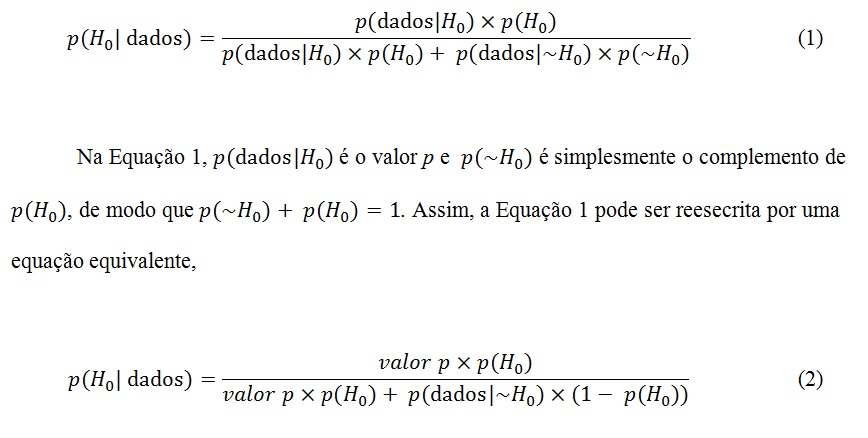

In [1]:
from IPython.display import Image
Image(filename = '004 - teorema de bayes.jpg')

Alguns defensores da abordagem do teste de significância da hipótese nula (em inglês, NHST) argumentam que o valor *p*, isto é, *p*(dados|H0), está correlacionado com *p*(H0|dados). Se isso for verdade, ainda que seja difícil obter *p*(H0|dados), podemos usar *p*(dados|H0) como um *proxy* de *p*(H0|dados). No entanto, a força do argumento correlacional se baseia na magnitude da correlação entre *p*(dados|H0) e *p*(H0|dados): Quanto maior for essa correlação, mais força o argumento correlacional ganha; se a correlação for baixa ou inexistente, por outro lado, o argumento se desfaz e só resta a falácia lógica mencionada na seção anterior.

E é este argumento correlacional que Trafimow e Rice (2009) testam, a partir de uma simulação, em seu artigo. A seguir, eu tentarei replicar a simulação deles. =)


In [2]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
# Definindo uma semente
np.random.seed(123)

# Parâmetros da simulação
n_simulacoes = 65_000

p_H0 = np.random.uniform(size = n_simulacoes) # probabilidade a priori de H0 ser verdadeira
p_dados_nao_H0 = np.random.uniform(size = n_simulacoes) # probabilidade dos dados, caso H0 seja falsa
p_dados_H0 = np.random.uniform(size = n_simulacoes) # valor p

# Valor calculado por meio do teorema de Bayes (Eq. 2, acima)
p_H0_dados = (p_dados_H0 * p_H0) / ((p_dados_H0 * p_H0) + (p_dados_nao_H0 * (1 - p_H0)))

Testando o argumento correlacional: qual é a magnitude da relação linear entre o valor *p* (**p_dados_H0** e **p_H0_dados**)?

In [5]:
r = np.corrcoef(p_dados_H0, p_H0_dados)[0][1]
print(f""""A correlação entre o valor p e a probabilidade a posteriori é de {r:.3f}.
Esse valor indica que o valor p explica aproximadamente {r ** 2 * 100:.3f}% da variância da probabilidade a posteriori.""")

"A correlação entre o valor p e a probabilidade a posteriori é de 0.369.
Esse valor indica que o valor p explica aproximadamente 13.587% da variância da probabilidade a posteriori.


Os valores acima foram próximos dos reportados por Trafimow e Rice (2009): *The issue of primary interest concerns the ability of pactual to predict p(H0|F). This correlation (r) was .396. Although the correlation was statistically significant because of the high number of data sets, the variance in p(H0|F) that pactual accounted for was less than 16%, thereby leaving more than 84% of the variance unaccounted for*. Logo, entende-se que o argumento correlacional não é empiricamente apoiado e, portanto, não é uma justificativa aceitável para o endosso do uso do valor *p* como um *proxy* da probabilidade da hipótese nula ser verdadeira, dados os dados observados.

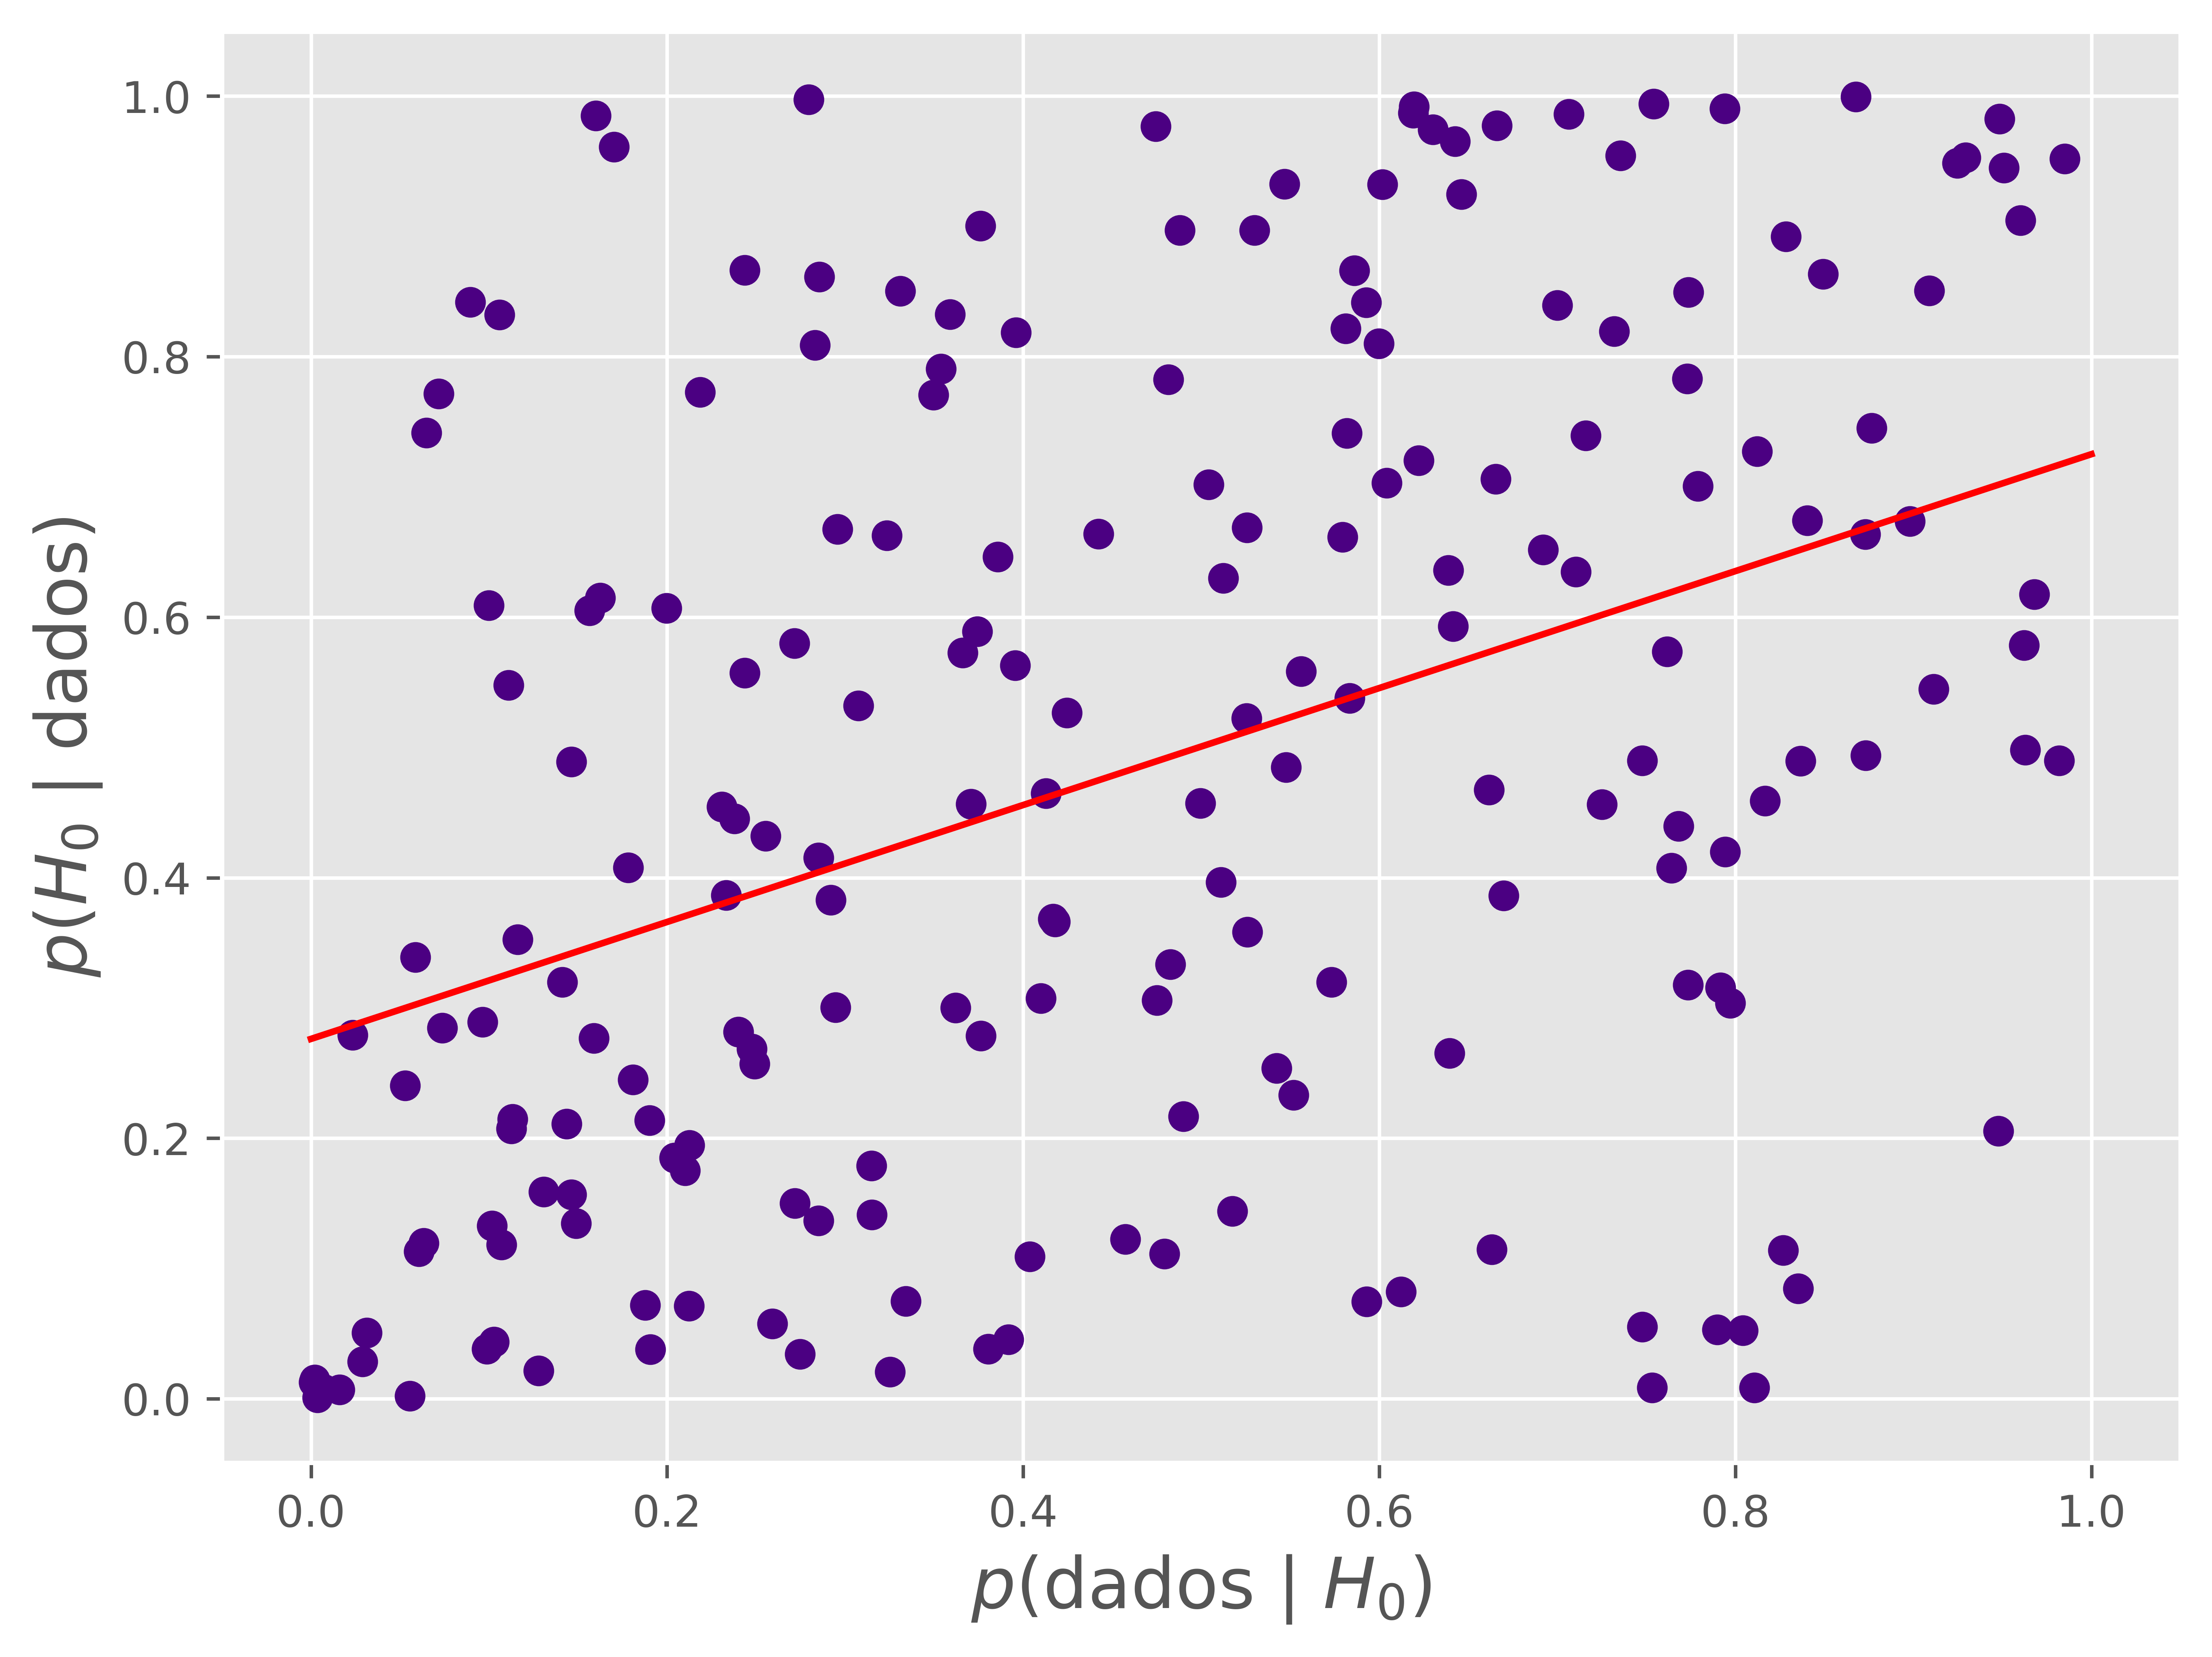

In [7]:
# Estilo do gráfico
plt.style.use('ggplot')

# Tamanho e resolução do gráfico
plt.figure(figsize = (8, 6), dpi = 800)

# Diagrama de dispersão (apenas 200 primeiras observações da simulação)
plt.plot(p_dados_H0[:200], p_H0_dados[:200], 'o', color = 'indigo')

# Linha de melhor ajuste linear aos dados
slope, intercept = np.polyfit(p_dados_H0[:200], p_H0_dados[:200], 1)
x = np.linspace(0, 1, 1000)

# Plotando a linha
plt.plot(x, intercept + x * slope, color = 'red')

# Rótulos
plt.xlabel("$\it{p}$(dados | $\it{H}_{0}$)", fontsize = 16)
plt.ylabel("$\it{p}$($\it{H}_{0}$ | dados)", fontsize = 16)

# Salvando o gráfico
plt.savefig('004 - Valor p e p(H0, dados os dados).jpg', dpi = 600, bbox_inches = "tight")

plt.show()

Pelo visto, o argumento correlacional não está se dando muito bem. Vamos dar mais uma chance para ele...

In [10]:
# Dicotomizando probabilidades, para ver se o valor p "concorda" com a probabilidade a posteriori

# se p < 0,05, significativo (0); caso contrário, não significativo (1)
p_dados_H0_menor_05 = np.where(p_dados_H0 < 0.05, 0, 1) 

# se p < 0,01, significativo (0); caso contrário, não significativo (1)
p_dados_H0_menor_01 = np.where(p_dados_H0 < 0.01, 0, 1) 

# se p < 0,001, significativo (0); caso contrário, não significativo (1)
p_dados_H0_menor_001 = np.where(p_dados_H0 < 0.001, 0, 1) 

# mesma lógica do p < 0,05, mas usando probabilidade a posteriori < 0,05
p_H0_dados_menor_05 = np.where(p_H0_dados < 0.05, 0, 1) 

In [11]:
# Correlação dos valores p dicotomizados com a probabilidade a posteriori sem dicotomizar
r1 = np.corrcoef(p_dados_H0_menor_05, p_H0_dados)[0][1]
r2 = np.corrcoef(p_dados_H0_menor_01, p_H0_dados)[0][1]
r3 = np.corrcoef(p_dados_H0_menor_001, p_H0_dados)[0][1]

print(f"Correlações com probabilidade a posteriori: (a) p < 0,05: {r1:.3f}; (b) p < 0,01: {r2:.3f}; e (c) p < 0,001: {r3:.3f}.")

Correlações com probabilidade a posteriori: (a) p < 0,05: 0.247; (b) p < 0,01: 0.135; e (c) p < 0,001: 0.042.


A correlação caiu para em torno de 0,25, 0,14 e 0,05. No artigo original, esse valor caiu para .289, .188, .089. Resultados são congruentes: argumento correlacional se lascou. =P

**Concluindo:** o argumento correlacional não é apoiado por estudos de simulação como racional para sustentar o uso do valor *p* como um *proxy* para **p(dados|H0)**.